
===== Expense Tracker =====
1. Add Expense
2. Show Monthly Summary
3. Show Chart
4. Exit


Choose an option:  1
Enter category (e.g., food, transport, etc.):  food 200
Enter amount:  200
Enter date (YYYY-MM-DD), leave empty for today:  


✅ Expense added!

===== Expense Tracker =====
1. Add Expense
2. Show Monthly Summary
3. Show Chart
4. Exit


Choose an option:  2
Enter month (YYYY-MM):  2025-06



📊 Expense Summary for 2025-06:
food 200: ₹200.00

===== Expense Tracker =====
1. Add Expense
2. Show Monthly Summary
3. Show Chart
4. Exit


Choose an option:  3
Enter month (YYYY-MM):  2025-06



📊 Expense Summary for 2025-06:
food 200: ₹200.00

1. Pie Chart
2. Bar Chart


Choose chart type (1 or 2):  2


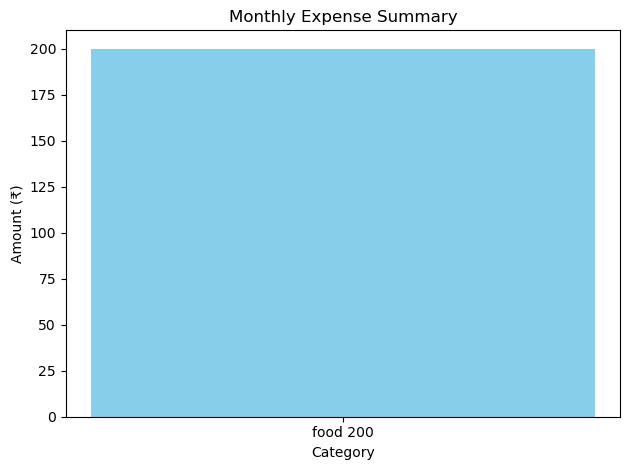


===== Expense Tracker =====
1. Add Expense
2. Show Monthly Summary
3. Show Chart
4. Exit


Choose an option:  4


👋 Exiting Expense Tracker. Bye!


In [1]:
# import json
import os
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt

DATA_FILE = 'expenses.json'

def load_data():
    if not os.path.exists(DATA_FILE):
        return []
    with open(DATA_FILE, 'r') as f:
        return json.load(f)

def save_data(data):
    with open(DATA_FILE, 'w') as f:
        json.dump(data, f, indent=4)

def add_expense():
    category = input("Enter category (e.g., food, transport, etc.): ").strip()
    amount = float(input("Enter amount: "))
    date_str = input("Enter date (YYYY-MM-DD), leave empty for today: ").strip()
    date = date_str if date_str else datetime.today().strftime('%Y-%m-%d')

    expense = {"category": category, "amount": amount, "date": date}
    data = load_data()
    data.append(expense)
    save_data(data)
    print("✅ Expense added!")

def monthly_summary():
    data = load_data()
    month = input("Enter month (YYYY-MM): ").strip()

    summary = defaultdict(float)
    for item in data:
        if item["date"].startswith(month):
            summary[item["category"]] += item["amount"]

    if not summary:
        print("❌ No data for this month.")
        return

    print(f"\n📊 Expense Summary for {month}:")
    for category, total in summary.items():
        print(f"{category}: ₹{total:.2f}")

    return summary

def plot_summary():
    summary = monthly_summary()
    if not summary:
        return

    print("\n1. Pie Chart\n2. Bar Chart")
    choice = input("Choose chart type (1 or 2): ")

    categories = list(summary.keys())
    amounts = list(summary.values())

    if choice == '1':
        plt.pie(amounts, labels=categories, autopct='%1.1f%%')
        plt.title("Monthly Expense Distribution")
    else:
        plt.bar(categories, amounts, color='skyblue')
        plt.title("Monthly Expense Summary")
        plt.xlabel("Category")
        plt.ylabel("Amount (₹)")
    plt.tight_layout()
    plt.show()

def main():
    while True:
        print("\n===== Expense Tracker =====")
        print("1. Add Expense")
        print("2. Show Monthly Summary")
        print("3. Show Chart")
        print("4. Exit")

        choice = input("Choose an option: ")

        if choice == '1':
            add_expense()
        elif choice == '2':
            monthly_summary()
        elif choice == '3':
            plot_summary()
        elif choice == '4':
            print("👋 Exiting Expense Tracker. Bye!")
            break
        else:
            print("❌ Invalid choice, please try again.")

if __name__ == "__main__":
    main()
